# **LAB 04: KMEANS CLUSTERING**

# Data Exploration & Processing

In [685]:
# import library
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [686]:
# get data
df = pd.read_csv("https://raw.githubusercontent.com/kanedinh/datasets/main/College.csv")

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [687]:
# print data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [688]:
# drop column universities's name
df.drop(df.columns[0], axis=1, inplace=True)
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [689]:
# change column 'Private' type and transform Yes->1, No->0
df['Private'] = df["Private"].replace({'Yes': 1, 'No': 0}).astype('category')
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [690]:
# data types
df.dtypes

Private        category
Apps              int64
Accept            int64
Enroll            int64
Top10perc         int64
Top25perc         int64
F.Undergrad       int64
P.Undergrad       int64
Outstate          int64
Room.Board        int64
Books             int64
Personal          int64
PhD               int64
Terminal          int64
S.F.Ratio       float64
perc.alumni       int64
Expend            int64
Grad.Rate         int64
dtype: object

In [691]:
# check missing value
print(df.isnull().sum())

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [692]:
# check data
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Statistics for a large number of US Colleges from the 1995 issue of US News and
World Report, with 777 observations on the following 18 variables.
1. Private: A factor with levels No and Yes indicating private or public university
2. Apps: Number of applications received
3. Accept: Number of applications accepted
4. Enroll: Number of new students enrolled
5. Top10perc: Pct. new students from the top 10% of H.S. class
6. Top25perc: Pct. new students from the top 25% of H.S. class
7. F.Undergrad: Number of full-time undergraduates
8. P.Undergrad: Number of part-time undergraduates
9. Outstate: Out-of-state tuition
10. Room.Board: Room and board costs
11. Books: Estimated book costs
12. Personal: Estimated personal spending
13. PhD: Pct. of faculty with Ph.D.’s
14. Terminal: Pct. of faculty with a terminal degree
15. S.F.Ratio: Student/faculty ratio
16. perc.alumni: Pct. alumni who donate

In [693]:
df.loc[df.Apps < df.Accept]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


Fix data error

In [694]:
df.loc[df.PhD > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
582,0,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [695]:
# change percentage to 100 if percentage over 100
df.loc[df.PhD > 100, 'PhD'] = 100

In [696]:
df.loc[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [697]:
# change percentage to 100 if percentage over 100
df.loc[df['Grad.Rate'] > 100, 'Grad.Rate'] = 100

In [698]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 777
Columns: 18


In [699]:
# X: feature, y: target
X = df.drop("Private", axis=1)
y = df["Private"]

In [700]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X_std

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

# Implement the KMeans Clustering

In [701]:
# Create a class implement the Kmeans Clustering
class Kmeans:
    # Constructor:
    def __init__(self, K=8, tol=1e-4, max_iter=300):
        self.K = K
        self.tol = tol
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.n_iter_ = None
        self.inertia_ = None

    # Method to train the K-Means model on the input data
    def fit(self, X):
        # Initialize centroids randomly
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.K, replace=False)]
        
        for it in range(self.max_iter):
            # Assign each data point to the nearest centroid
            distances = distance.cdist(X, self.cluster_centers_)
            labels = np.argmin(distances, axis=1)
            
            # Update centroids based on mean of data points in each cluster
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.K)])
            
            # Check for convergence
            if np.allclose(self.cluster_centers_, new_centers, atol=self.tol):
                break
            
            self.cluster_centers_ = new_centers

        # Save
        self.labels_ = labels # Labels of each point
        self.n_iter_ = it # Number of iterations run
        self.inertia_ = np.sum(np.min(distances, axis=1) ** 2) # Sum of squared distances of samples to their closest cluster center

    # Method to transform input data to a cluster-distance space
    def transform(self, X):
        return distance.cdist(X, self.cluster_centers_)
    
    # Method to predict cluster labels for new data points
    def predict(self, X):
        distances = distance.cdist(X, self.cluster_centers_)
        return np.argmin(distances, axis=1)

    # Method to compute clustering and transform X to cluster-distance space
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    # Method to compute cluster centers and predict cluster index for each sample
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

# Testing & Validation

Test the custom kmeans clustering

In [702]:
kmeans_class = Kmeans(K=3)
kmeans_class.fit(X_std)

In [703]:
kmeans_class.transform(X_std)

array([[ 1.93288021,  5.35188309,  4.63271259],
       [ 4.70067477,  7.86400942,  6.58521178],
       [ 1.85147931,  6.54158422,  3.97363377],
       ...,
       [ 1.88594657,  5.44545484,  3.64166057],
       [10.60664319,  9.96598738,  7.3309767 ],
       [ 3.2193545 ,  5.56267363,  4.32245247]])

In [704]:
kmeans_class.predict(X_std)

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

In [705]:
print(">> cluster_center: ", kmeans_class.cluster_centers_)
print(">> n_iter: ", kmeans_class.n_iter_)
print(">> inertia: ", kmeans_class.inertia_)

>> cluster_center:  [[-0.36999889 -0.35980676 -0.33511242 -0.53070445 -0.55831112 -0.30983851
  -0.12470744 -0.48071016 -0.37212821 -0.10346843  0.04239353 -0.57026764
  -0.56550541  0.23908681 -0.34511476 -0.44284939 -0.36095718]
 [ 1.8406535   2.0087858   2.20390747  0.22998143  0.39926533  2.26775172
   1.57976036 -0.53724098 -0.16966     0.3264646   0.81215031  0.69085194
   0.67868889  0.5848428  -0.59493273 -0.05853333 -0.36387534]
 [-0.04240503 -0.12264378 -0.23809842  0.83574983  0.82070141 -0.30572398
  -0.37117873  1.03436648  0.70912808  0.05817637 -0.37571509  0.73298771
   0.72924513 -0.63261623  0.82043419  0.79056093  0.76198329]]
>> n_iter:  22
>> inertia:  8251.749015759007


Implement Sklearn Kmeans Clustering

In [706]:
from sklearn.cluster import KMeans

In [707]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [708]:
kmeans.transform(X_std)

array([[ 1.93288021,  5.35188309,  4.63271259],
       [ 4.70067477,  7.86400942,  6.58521178],
       [ 1.85147931,  6.54158422,  3.97363377],
       ...,
       [ 1.88594657,  5.44545484,  3.64166057],
       [10.60664319,  9.96598738,  7.3309767 ],
       [ 3.2193545 ,  5.56267363,  4.32245247]])

In [709]:
kmeans.predict(X_std)

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

In [710]:
print(">> cluster_center: ", kmeans.cluster_centers_)
print(">> n_iter: ", kmeans.n_iter_)
print(">> inertia: ", kmeans.inertia_)

>> cluster_center:  [[-0.36999889 -0.35980676 -0.33511242 -0.53070445 -0.55831112 -0.30983851
  -0.12470744 -0.48071016 -0.37212821 -0.10346843  0.04239353 -0.57026764
  -0.56550541  0.23908681 -0.34511476 -0.44284939 -0.36095718]
 [ 1.8406535   2.0087858   2.20390747  0.22998143  0.39926533  2.26775172
   1.57976036 -0.53724098 -0.16966     0.3264646   0.81215031  0.69085194
   0.67868889  0.5848428  -0.59493273 -0.05853333 -0.36387534]
 [-0.04240503 -0.12264378 -0.23809842  0.83574983  0.82070141 -0.30572398
  -0.37117873  1.03436648  0.70912808  0.05817637 -0.37571509  0.73298771
   0.72924513 -0.63261623  0.82043419  0.79056093  0.76198329]]
>> n_iter:  16
>> inertia:  8251.749015759005


Validate the correctness of Custom Kmeans and Sklearn Kmeans

In [711]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [712]:
print(">> Accuracy score between Sklearn KMeans and Custom KMeans: ", accuracy_score(kmeans.labels_, kmeans_class.labels_))
print(">> Confusion matrix between Sklearn KMeans and Custom KMeans: \n", confusion_matrix(kmeans.labels_, kmeans_class.labels_))
print(">> Classification report between Sklearn KMeans and Custom KMeans: \n", classification_report(kmeans.labels_, kmeans_class.labels_))

>> Accuracy score between Sklearn KMeans and Custom KMeans:  1.0
>> Confusion matrix between Sklearn KMeans and Custom KMeans: 
 [[434   0   0]
 [  0  93   0]
 [  0   0 250]]
>> Classification report between Sklearn KMeans and Custom KMeans: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00       250

    accuracy                           1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777



Compare the Custom Kmeans with the Sklearn Kmeans, accuracy approximate 100%

**Choose the optimal K for KMeans**

Elbow Method

In [713]:
# Create Distorsion (inertia_) with each K
distorsions = []
    
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_std)
    distorsions.append(kmeanModel.inertia_)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

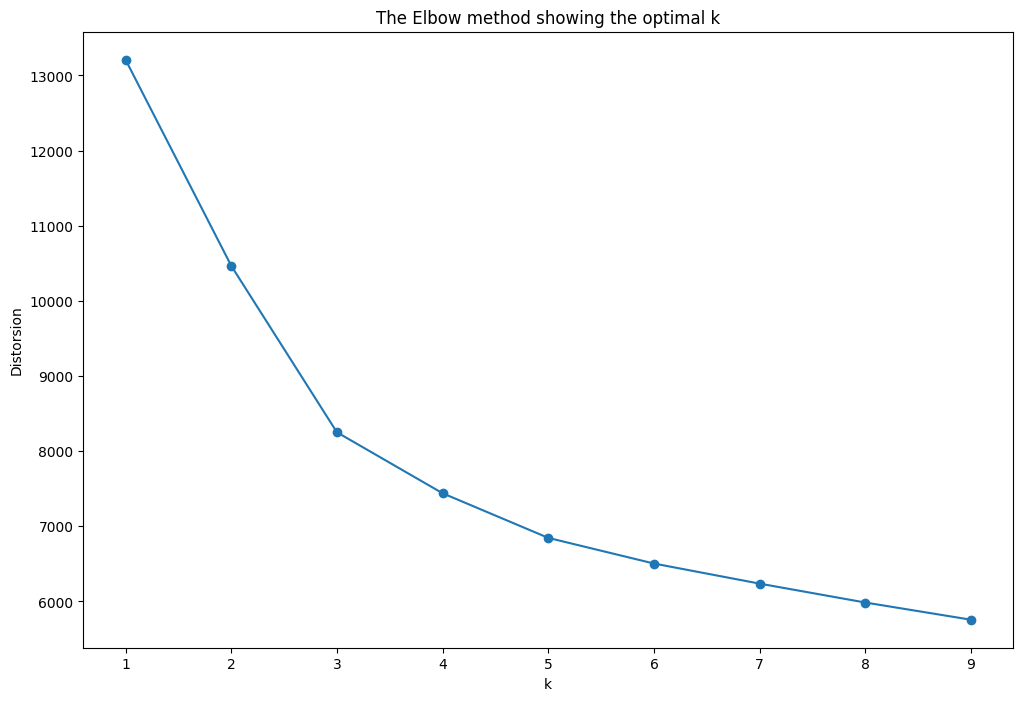

In [714]:
# Visualize Distorsion base on each value K
plt.figure(figsize=(12,8))
plt.plot(range(1,10), distorsions, marker='o')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title('The Elbow method showing the optimal k')
plt.show()

The 'Elbow' point is k = 3. This is the optimal K

Silhouette score

In [715]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_std, labels))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

C:\Users\Admin\AppData\Local\Temp\ipykernel_20964\78664681.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(range(2, 11), sil_scores, 'bx-', marker='o')


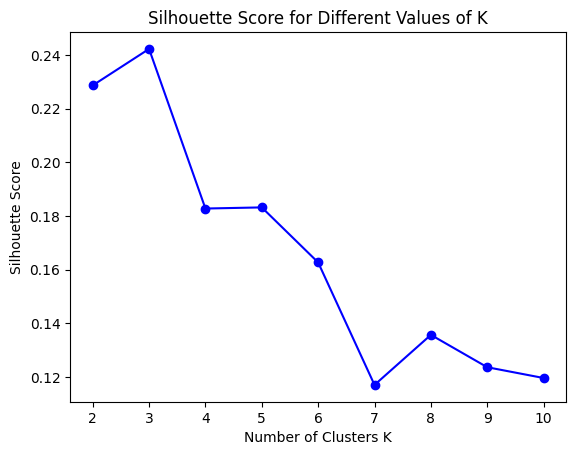

In [726]:
plt.plot(range(2, 11), sil_scores, 'bx-', marker='o')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.show()

According Silhouette score, we choose the highest score => the optimal k = 3

Compare the results of Custom K-means with the Private attribute in the dataset (choose K = 2 because the Private attribute in the dataset has {0, 1} value)

In [727]:
kmeans_class = Kmeans(K = 2)
kmeans_class.fit(X_std)

In [728]:
print("Custom Kmeans".center(50, '-'))
print(">> Accuracy score: ", accuracy_score(y, kmeans_class.labels_))
print(">> Confusion matrix: \n", confusion_matrix(y, kmeans_class.labels_))
print(">> Classification report: \n", classification_report(y, kmeans_class.labels_))

------------------Custom Kmeans-------------------
>> Accuracy score:  0.47619047619047616
>> Confusion matrix: 
 [[145  67]
 [340 225]]
>> Classification report: 
               precision    recall  f1-score   support

           0       0.30      0.68      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.53      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



Compare the results of Sklearn K-means with the Private attribute in the dataset

In [729]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_std)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [730]:
print("Sklearn Kmeans".center(50, '-'))
print(">> Accuracy score: ", accuracy_score(y, kmeans.labels_))
print(">> Confusion matrix: \n", confusion_matrix(y, kmeans.labels_))
print(">> Classification report: \n", classification_report(y, kmeans.labels_))

------------------Sklearn Kmeans------------------
>> Accuracy score:  0.4774774774774775
>> Confusion matrix: 
 [[146  66]
 [340 225]]
>> Classification report: 
               precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



**Reduce dimensions to 2 for visualization**

In [731]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca

array([[-1.59326606,  0.76460625],
       [-2.19336249, -0.58128005],
       [-1.43055088, -1.09459984],
       ...,
       [-0.73411661, -0.07775883],
       [ 7.92369784, -2.05736792],
       [-0.46473084,  0.36392747]])

In [732]:
# With n_components = 2, we keep 58% information of data
print("Information keeping:", pca.explained_variance_ratio_.sum())

Information keeping: 0.5838897390886784


Text(0, 0.5, 'PCA Component 2')

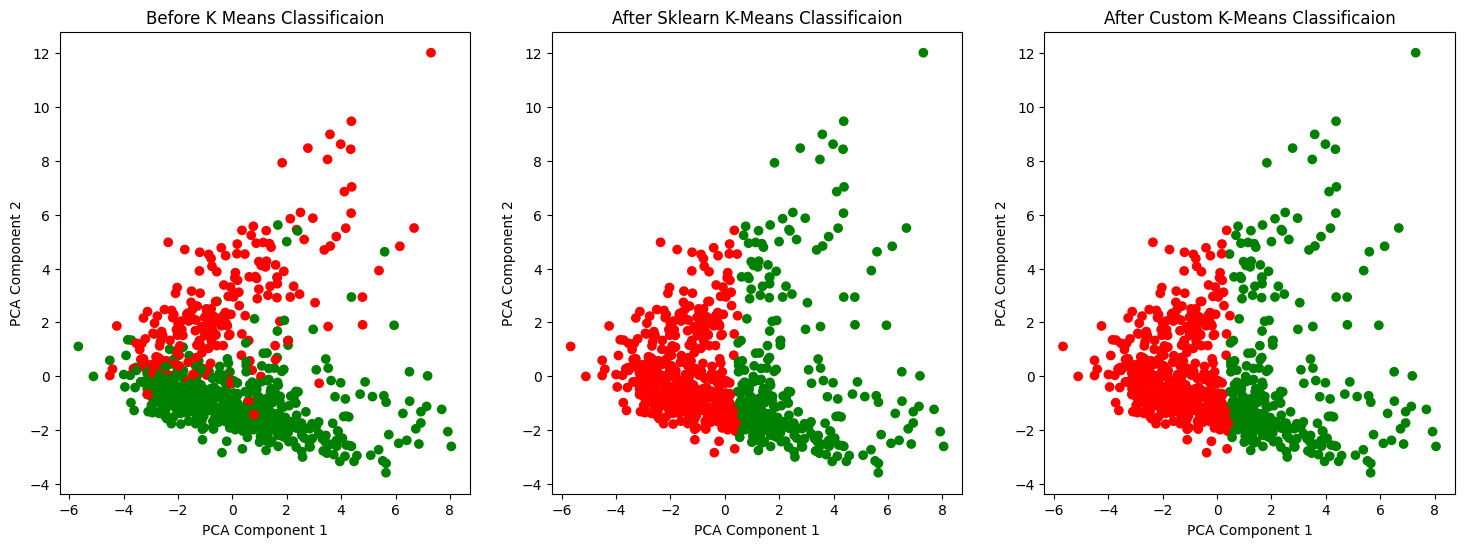

In [736]:
# Visualize with k = 2 (n_cluster)
colors = np.array(["Red", "Green"])

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[y])
plt.title("Before K Means Classificaion")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1,3,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[kmeans.labels_])
plt.title("After Sklearn K-Means Classificaion")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1,3,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[kmeans_class.labels_])
plt.title("After Custom K-Means Classificaion")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [745]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X_std)

kmeans_class3 = Kmeans(K=3)
kmeans_class3.fit(X_std)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PCA Component 2')

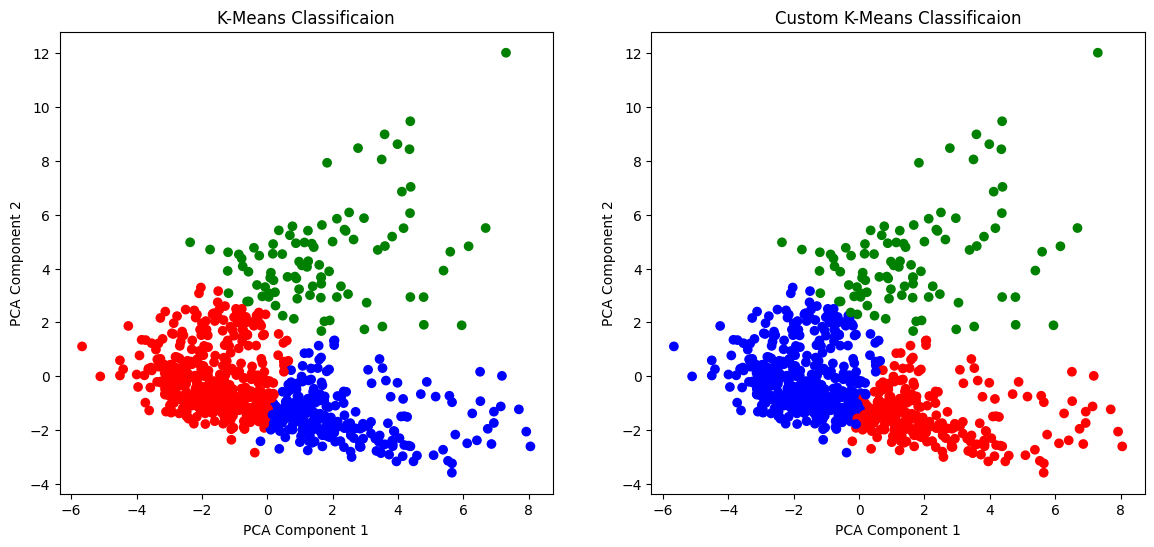

In [746]:
# Visualize with k = 3 (n_cluster)
colors = np.array(["Red", "Green", "Blue"])

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[kmeans3.labels_])
plt.title("K-Means Classificaion")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors[kmeans_class3.labels_])
plt.title("Custom K-Means Classificaion")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Report Summarizing

Với dataset 'College.csv':
- Loại bỏ thuộc tính thể hiện tên trường đại học (cột 1) (do cột này không cần thiết)
- Encoder label (thuộc tính 'Private')
- Chỉnh sửa dữ liệu không hợp lệ (tỉ lệ phần trăm vượt quá 100) về đúng của nó

Tạo 1 class thực hiện thuật toán KMeans Clustering (Custom KMeans) và so sánh nó với thuật toán KMeans Clustering của thư viện Sklearn (Sklearn KMeans) thì ta đạt được:
- So sánh độ chính xác của Custom KMeans so với Sklearn KMeans thì đạt xấp xỉ 100% 
- Các chỉ số khác của Custom Kmeans khá sát so với Sklearn KMeans

Để tìm được số phân cụm (k) tối ưu nhất thì ta sử dụng "elbow method" hoặc "sillhouette score" thì cả 2 cách đều cho ra số phân cụm k tối ưu nhất là 3


So sánh kết quả của Custom KMeans và Sklearn KMeans với thuộc tính 'Private' của dataset thì nhìn qua biểu đồ trên ta sẽ thấy rõ:
- thuộc tính 'Private' thể hiện như là phân cụm chia theo chiều ngang
- còn Custom KMeans và Sklearn KMeans thì giống nhau nhưng lại chia theo chiều dọc cho nên so sánh kết quả thì sẽ không chính xác được